In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import roc_curve

In [2]:
df=pd.read_csv('parkinsons.data')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

MDVP - Multidimensional Voice Program
MDVP:F0 (Hz)	Average vocal fundamental frequency
MDVP:Fhi (Hz)	Maximum vocal fundamental frequency
MDVP:Flo (Hz)	Minimum vocal fundamental frequency
MDVP:Jitter(%)	MDVP jitter in percentage
MDVP:Jitter(Abs)	MDVP absolute jitter in ms
MDVP:RAP	MDVP relative amplitude perturbation
MDVP:PPQ	MDVP five-point period perturbation quotient
Jitter:DDP	Average absolute difference of differences between jitter cycles
MDVP:Shimmer	MDVP local shimmer
MDVP:Shimmer(dB)	MDVP local shimmer in dB
Shimmer:APQ3	Three-point amplitude perturbation quotient
Shimmer:APQ5	Five-point amplitude perturbation quotient
MDVP:APQ11	MDVP 11-point amplitude perturbation quotient
Shimmer:DDA	Average absolute differences between the amplitudes of consecutive periods
NHR	Noise-to-harmonics ratio
HNR	Harmonics-to-noise ratio
RPDE	Recurrence period density entropy measure
D2	Correlation dimension
DFA	Signal fractal scaling exponent of detrended fluctuation analysis
Spread1	Two nonlinear measures of fundamental
Spread2	Frequency variation
PPE	Pitch period entropy

In [19]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [3]:
df.drop('name',axis=1,inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
x=df.drop('status',axis=1)
y=df['status']
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=1)

<h1>Logistic Regression</h1>

In [23]:
from sklearn.linear_model import LogisticRegression
LG_model=LogisticRegression()
LG_model.fit(x_train,y_train)
lg_pred=LG_model.predict(x_test)


C:\Users\eusuf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
LG_model.score(x_train,y_train)

0.8698630136986302

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,lg_pred)

0.11711711711711714

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,lg_pred)

array([[ 7,  5],
       [ 3, 34]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.87      0.92      0.89        37

    accuracy                           0.84        49
   macro avg       0.79      0.75      0.77        49
weighted avg       0.83      0.84      0.83        49



In [38]:
import pickle
file=open("Parkinson_LG.pkl","wb")
pickle.dump(LG_model,file)
file.close()

In [39]:
file=open("Parkinson_LG.pkl","rb")
LG_data=pickle.load(file)
file.close()
data

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
p=np.array([[198.764,396.961,74.904,0.0074,0.00004,0.0037,0.0039,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.02,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306]])
LG_data.predict(p)

array([0], dtype=int64)

<h5>ROC ( Receiver Operating Characteristic )</h5>

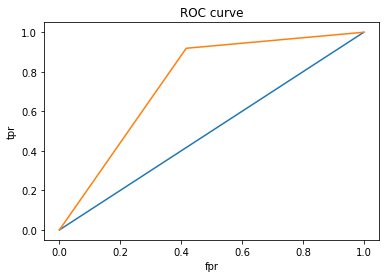

In [61]:

#fpr = false positive , tpr = true positive
lg_fpr, lg_tpr, thresholds = roc_curve(y_test, lg_pred)
plt.plot([0,1],[0,1])
plt.plot(lg_fpr, lg_tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

<h1> XGBClassifier </h1>

In [15]:
from xgboost import XGBClassifier
XGBC_model = XGBClassifier()
XGBC_model.fit(x_train, y_train)

[23:49:43] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\eusuf\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
from sklearn.metrics import accuracy_score
xgbc_pred=XGBC_model.predict(x_test)
accuracy_score(y_test,xgbc_pred)

C:\Users\eusuf\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9183673469387755

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,xgbc_pred)

0.5585585585585586

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,xgbc_pred)

array([[ 9,  3],
       [ 1, 36]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,xgbc_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.92      0.97      0.95        37

    accuracy                           0.92        49
   macro avg       0.91      0.86      0.88        49
weighted avg       0.92      0.92      0.92        49



<h5>ROC ( Receiver Operating Characteristic )</h5>

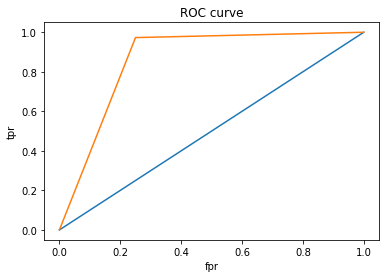

In [62]:
xgbc_fpr, xgbc_tpr, thresholds = roc_curve(y_test, xgbc_pred)
plt.plot([0,1],[0,1])
plt.plot(xgbc_fpr, xgbc_tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [10]:
p=np.array([[198.764,396.961,74.904,0.0074,0.00004,0.0037,0.0039,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.02,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306]])
XGBC_model.predict(p)

array([0], dtype=int64)

In [11]:
m=np.array([[214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.19,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569]])
XGBC_model.predict(m)

array([0], dtype=int64)

In [24]:
fn=np.array([[91.904,115.871,86.292,0.0054,0.00006,0.00281,0.00336,0.00844,0.02752,0.249,0.01424,0.01641,0.02214,0.04272,0.01141,21.414,0.58339,0.79252,-4.960234,0.363566,2.642476,0.275931]])
XGBC_model.predict(fn)

array([1], dtype=int64)

In [36]:
import pickle
file=open("Parkinson_XGBC.pkl","wb")
pickle.dump(XGBC_model,file)
file.close()

In [37]:
file=open("Parkinson_XGBC.pkl","rb")
XGBC_data=pickle.load(file)
file.close()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
p=np.array([[198.764,396.961,74.904,0.0074,0.00004,0.0037,0.0039,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.02,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306]])
XGBC_data.predict(p)

array([0], dtype=int64)

<h1> KNClassifier </h1>

In [28]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model= KNeighborsClassifier()
KNN_model.fit(x_train,y_train)
knn_pred=KNN_model.predict(x_test)
KNN_model.score(x_train,y_train)

0.9041095890410958

In [29]:
accuracy_score(y_test,knn_pred)

0.8367346938775511

In [30]:
r2_score(y_test,knn_pred)

0.11711711711711714

In [31]:
confusion_matrix(y_test,knn_pred)

array([[ 7,  5],
       [ 3, 34]], dtype=int64)

In [32]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.87      0.92      0.89        37

    accuracy                           0.84        49
   macro avg       0.79      0.75      0.77        49
weighted avg       0.83      0.84      0.83        49



In [48]:
file=open("Parkinson_KNN.pkl","wb")
pickle.dump(KNN_model,file)
file.close()

In [49]:
file=open("Parkinson_KNN.pkl","rb")
KNN_data=pickle.load(file)
file.close()

<h5>ROC ( Receiver Operating Characteristic )</h5>

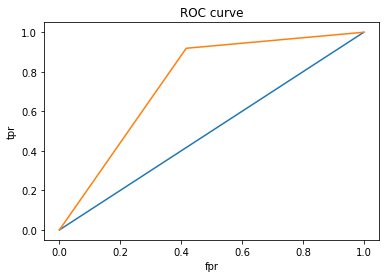

In [63]:
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_pred)
plt.plot([0,1],[0,1])
plt.plot(knn_fpr, knn_tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

<h1>SV Classifier</h1>

In [35]:
from sklearn.svm import SVC
SVC_model= SVC()
SVC_model.fit(x_train,y_train)
svc_pred=SVC_model.predict(x_test)
SVC_model.score(x_train,y_train)

0.815068493150685

In [36]:
accuracy_score(y_test,svc_pred)

0.8367346938775511

In [37]:
r2_score(y_test,svc_pred)

0.11711711711711714

In [38]:
confusion_matrix(y_test,svc_pred)

array([[ 4,  8],
       [ 0, 37]], dtype=int64)

In [39]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.82      1.00      0.90        37

    accuracy                           0.84        49
   macro avg       0.91      0.67      0.70        49
weighted avg       0.87      0.84      0.80        49



In [57]:
file=open("Parkinson_SVC.pkl","wb")
pickle.dump(SVC_model,file)
file.close()

In [58]:
file=open("Parkinson_SVC.pkl","rb")
SVC_data=pickle.load(file)
file.close()

<h5>ROC ( Receiver Operating Characteristic )</h5>

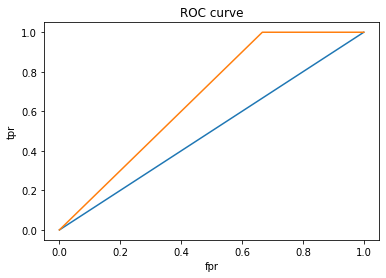

In [48]:
svc_fpr, svc_tpr, thresholds = roc_curve(y_test, svc_pred)
plt.plot([0,1],[0,1])
plt.plot(svc_fpr, svc_tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

<h1> Random Forest Classifier </h1>

In [41]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier()
RFC_model.fit(x_train, y_train)
rfc_pred=RFC_model.predict(x_test)
RFC_model.score(x_train,y_train)

1.0

In [42]:
accuracy_score(y_test,rfc_pred)

0.9183673469387755

In [43]:
r2_score(y_test,rfc_pred)

0.5585585585585586

In [44]:
confusion_matrix(y_test,rfc_pred)

array([[ 9,  3],
       [ 1, 36]], dtype=int64)

In [45]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.92      0.97      0.95        37

    accuracy                           0.92        49
   macro avg       0.91      0.86      0.88        49
weighted avg       0.92      0.92      0.92        49



In [64]:
file=open("Parkinson_RFC.pkl","wb")
pickle.dump(RFC_model,file)
file.close()

In [65]:
file=open("Parkinson_RFC.pkl","rb")
RFC_data=pickle.load(file)
file.close()

<h5>ROC ( Receiver Operating Characteristic )</h5>

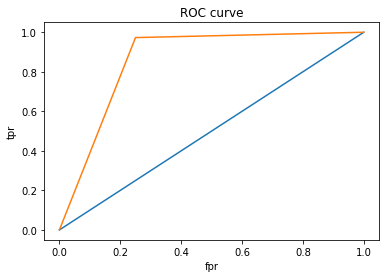

In [64]:
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, rfc_pred)
plt.plot([0,1],[0,1])
plt.plot(rfc_fpr, rfc_tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

<h1> Multi-class ROC ( Receiver Operating Characteristic )</h1>

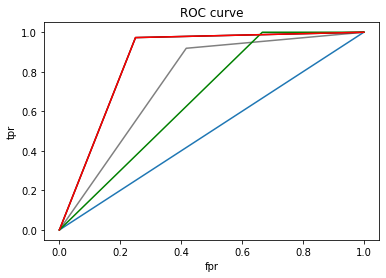

In [69]:
plt.plot([0,1],[0,1])
plt.plot(lg_fpr, lg_tpr, color="grey")
plt.plot(xgbc_fpr, xgbc_tpr, color="black")
plt.plot(knn_fpr, knn_tpr, color="blue")
plt.plot(svc_fpr, svc_tpr, color="green")
plt.plot(rfc_fpr, rfc_tpr, color="red")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

#legend("bottomright", 
      # legend = ("LogisticRegression score:.86", "XGBClassifier score:.91", "KNeighborsClassifier score:.90", "SV Classifier score:.81", "RandomForestClassifier score:1.0"), 
       #color = ("grey", "black", "blue", "green", "red"))

plt.show()